<a href="https://colab.research.google.com/github/indiradatta5/tesla_stock_predictor/blob/main/Tesla_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from prophet import Prophet
import pandas as pd
import plotly.express as px
import numpy as np

In [ ]:
import plotly.io as pio
pio.renderers.default ='colab'

In [ ]:
df = pd.read_csv('TSLA.csv')
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,214.774582,219.002470,210.566812,214.800677,214.800677,1.082525e+08
std,34.924231,35.536037,34.220257,34.903621,34.903621,2.847454e+07
min,140.559998,144.440002,138.800003,142.050003,142.050003,5.086970e+07
25%,181.900002,184.419998,176.959999,180.000000,180.000000,8.861535e+07
50%,215.880005,220.100006,212.009995,215.550003,215.550003,1.070651e+08
75%,247.580002,252.559998,242.270004,246.855003,246.855003,1.227825e+08
max,277.549988,278.980011,271.000000,276.040009,276.040009,2.438697e+08


In [ ]:
px.area(df, x= 'Date', y = 'Close')

In [ ]:
px.line(df, x= 'Date', y = 'Close')

In [ ]:
px.area(df, x= 'Date', y = 'Volume')

In [ ]:
px.bar(df, y = 'Volume')

In [ ]:
px.box(df, y = 'Close')

In [ ]:
column = ['Date', 'Close']
ndf = df[column]
ndf

,Date,Close
0,2023-07-21,260.019989
1,2023-07-24,269.059998
2,2023-07-25,265.279999
3,2023-07-26,264.350006
4,2023-07-27,255.710007
...,...,...
246,2024-07-15,252.639999
247,2024-07-16,256.559998
248,2024-07-17,248.500000
249,2024-07-18,249.229996


In [ ]:
prophet_df = ndf.rename(columns = {'Date': 'ds', 'Close': 'y'})
prophet_df

,ds,y
0,2023-07-21,260.019989
1,2023-07-24,269.059998
2,2023-07-25,265.279999
3,2023-07-26,264.350006
4,2023-07-27,255.710007
...,...,...
246,2024-07-15,252.639999
247,2024-07-16,256.559998
248,2024-07-17,248.500000
249,2024-07-18,249.229996


In [ ]:
model = Prophet()
model.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps_wa_mum/ja5wz2su.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps_wa_mum/pvccback.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36225', 'data', 'file=/tmp/tmps_wa_mum/ja5wz2su.json', 'init=/tmp/tmps_wa_mum/pvccback.json', 'output', 'file=/tmp/tmps_wa_mum/prophet_modeleq0zcome/prophet_model-20240721115442.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:54:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:54:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = model.make_future_dataframe(periods = 30)
forecast = model.predict(forecast)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-07-21,256.887801,234.605491,277.099669,256.887801,256.887801,-1.851775,-1.851775,-1.851775,-1.851775,-1.851775,-1.851775,0.0,0.0,0.0,255.036026
1,2023-07-24,256.369792,233.315476,277.140713,256.369792,256.369792,-1.245944,-1.245944,-1.245944,-1.245944,-1.245944,-1.245944,0.0,0.0,0.0,255.123847
2,2023-07-25,256.197122,236.298639,277.062675,256.197122,256.197122,1.108446,1.108446,1.108446,1.108446,1.108446,1.108446,0.0,0.0,0.0,257.305568
3,2023-07-26,256.024452,237.594798,276.755291,256.024452,256.024452,1.032719,1.032719,1.032719,1.032719,1.032719,1.032719,0.0,0.0,0.0,257.057171
4,2023-07-27,255.851782,231.525246,275.359071,255.851782,255.851782,-1.557162,-1.557162,-1.557162,-1.557162,-1.557162,-1.557162,0.0,0.0,0.0,254.294620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2024-08-14,246.768846,227.413388,270.076166,244.970545,248.989616,1.032719,1.032719,1.032719,1.032719,1.032719,1.032719,0.0,0.0,0.0,247.801566
277,2024-08-15,247.525826,224.975583,266.459620,245.560261,249.954577,-1.557162,-1.557162,-1.557162,-1.557162,-1.557162,-1.557162,0.0,0.0,0.0,245.968663
278,2024-08-16,248.282805,226.308251,267.268758,246.178013,250.835893,-1.851775,-1.851775,-1.851775,-1.851775,-1.851775,-1.851775,0.0,0.0,0.0,246.431030
279,2024-08-17,249.039785,228.761035,273.158059,246.802258,251.758795,1.256858,1.256858,1.256858,1.256858,1.256858,1.256858,0.0,0.0,0.0,250.296643


In [ ]:
px.line(forecast, x = 'ds', y = 'yhat')

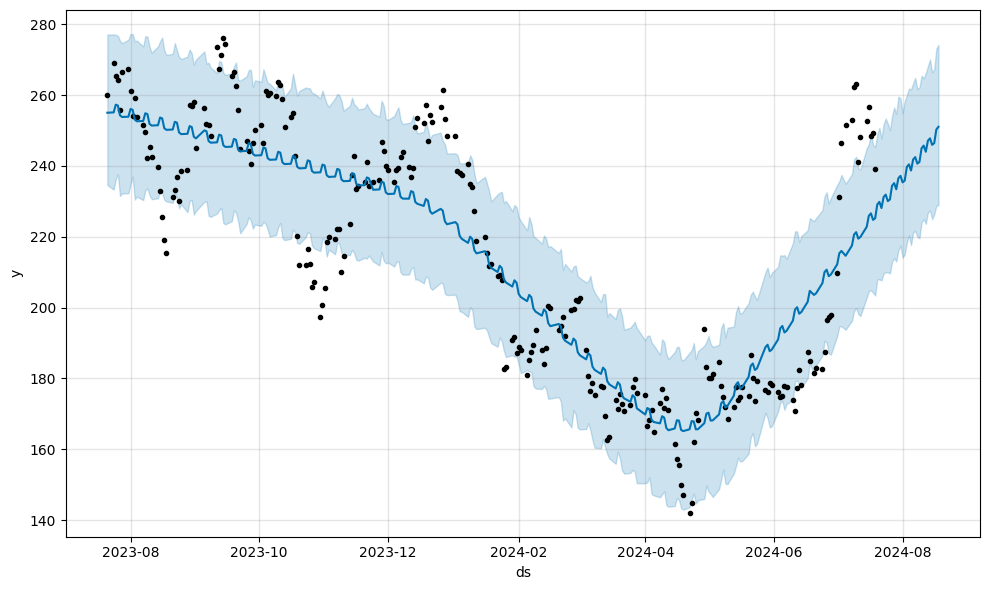

In [ ]:
figure = model.plot(forecast, xlabel = 'ds', ylabel='y')

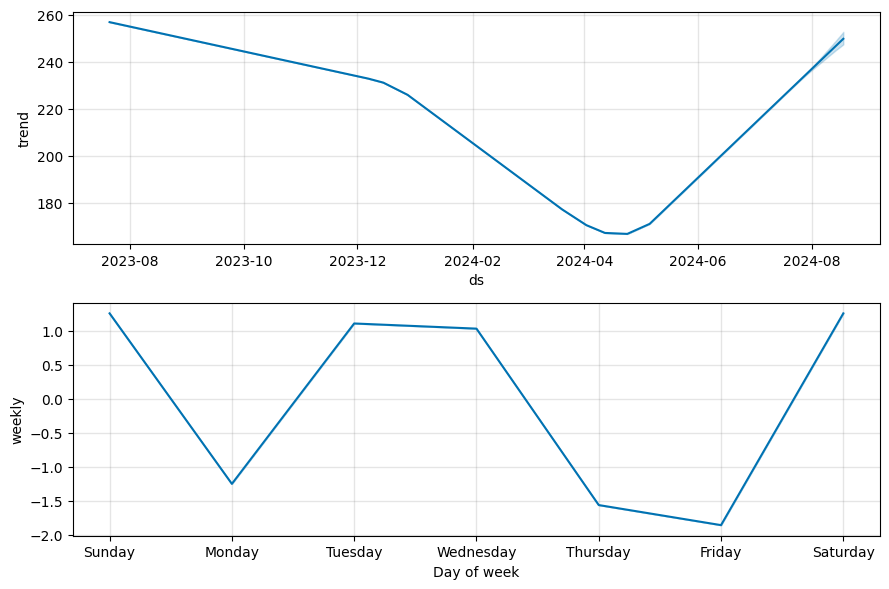

In [ ]:
plot1 = model.plot_components(forecast)

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>